In [20]:
import pandas as pd
import json
import seaborn as sns
import numpy as np

In [21]:

f = open('out.json')

data = json.load(f)
data_list = []
for text_id, annotated_text in data.items():
    annotation_ids = [k for k in annotated_text.keys() if k not in ["text", "text_id"]]
    annotations = []
    for an_id in annotation_ids:
        annotations.append(annotated_text[an_id])
    for annotation in annotations:
        new_text = {
            'text_id': text_id,
            'text': annotated_text['text'],
            'user_id': annotation["user_id"],
            'user_topics': [t for t in annotation["topics"] if t != ""],
        }
        data_list.append(new_text)

# Create DataFrame
df = pd.DataFrame(data_list)
df

,text_id,text,user_id,user_topics
0,d2e4422a-d1c0-4a88-a9cf-bbc186894371,"<b>Italie, jmenovitě severní, má od dob Karla...",cda7a4d1-e749-4780-a4ea-a21d40030990,"[mezistátní vztahy, malířske bratstvo]"
1,96e2e09d-af79-4fd5-bf04-235f61440ca5,"<b>Chce-li poznačiti nástroj, ukazuje na domn...",e843c941-f58c-496e-af8a-beef38820b13,"[nakládání s nástroji, pohyby s nástroji]"
2,151f5545-b49d-4a30-a755-7726732da4e9,<b>Při sázení některých složitějších prací je...,e843c941-f58c-496e-af8a-beef38820b13,"[typografie, grafický design, sazba textu, pří..."
3,41d19573-2e5f-4bb6-b13b-8868227d4567,"<b>Začali večeřeti, ale nedali tomu mnoho. Mí...",cda7a4d1-e749-4780-a4ea-a21d40030990,"[jedení, večeření]"
4,662cdb90-66fd-44ab-837a-ed6d824bb42f,<b>Letha od narození Syna božího tisíczeho pě...,cda7a4d1-e749-4780-a4ea-a21d40030990,"[uzavírání smlouv, pracovní smlouva]"
...,...,...,...,...
6480,0f332301-53f1-40e1-95a7-893a81443331,"<b>Stará klíčnice v žluté, kudrnaté paruce, p...",e843c941-f58c-496e-af8a-beef38820b13,"[Nepokojná klíčnice, Klíčnice v naději]"
6481,74c5b8c4-a0c2-4384-a24e-1473e6062318,"<b>„S bohem,“ řekl, podávaje Jindřichovi ruku...",e843c941-f58c-496e-af8a-beef38820b13,"[rozloučení, rozloučení dvou přátel]"
6482,b03cd9f2-51ed-44c4-b9ef-d80d0aad2d0e,<b>Stanice železniční t. jm. jest od města vz...,e843c941-f58c-496e-af8a-beef38820b13,[popis města]
6483,60dae35d-a7da-4cff-b64b-ba7b90136a83,"<b>Bedny, všeho druhu vaky a zavazadla skláda...",e843c941-f58c-496e-af8a-beef38820b13,[typy zavazadel]


In [22]:
df["topics_len"] = df["user_topics"].apply(lambda topic: len(topic))
df["text_len"] = df["text"].apply(lambda topic: len(topic))
df['topics_len'].unique()

array([2, 4, 3, 1, 5, 0, 6, 8, 7, 9])

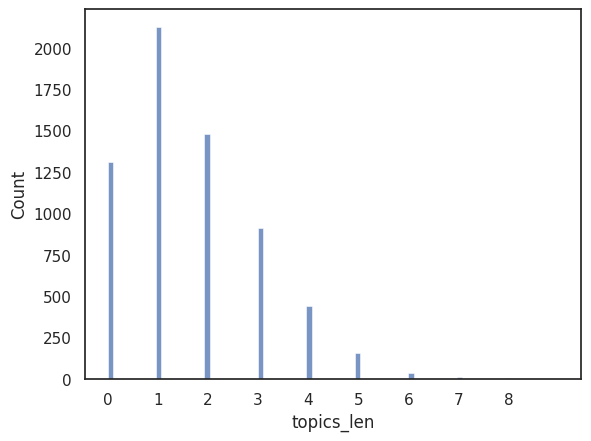

In [23]:
ax = sns.histplot(data=df, x="topics_len", )
ax.set_xticks([0, 1, 2, 3, 4, 5, 6, 7, 8])

In [24]:
df.query("topics_len == 9")



,text_id,text,user_id,user_topics,topics_len,text_len
2795,f933eab7-2e80-4d6e-8e89-7e7e519078e6,Skupinu zastupuje ve Spolkové radě její předse...,22bb39f3-d32e-4f55-8d7d-8a75b3e634b1,"[Volba místopředsedy, Pravomoci předsedy, Volb...",9,694
6116,70cf006f-165b-42ac-b894-8b90980c789a,<b>tenkrát se arci zdůrazňoval program jazyko...,7b7f9b9c-8498-48f0-8846-eb63141ada98,"[všekulturní národní program, národní programy...",9,218


,text_id,text,user_id,user_topics,topics_len,text_len
231,89d0cd20-cacb-4fa0-b632-97f9d3963715,"<b>česky, a má-li, neví, že k platnosti to je...",3d3576b3-78d9-4c54-bc2c-06929e310a5c,"[vlastenectví, konflikt vlastenectví, poněmčov...",5,1195
259,7198cfed-e77d-436a-83d9-ca76b5f551bd,<b>Thompson-ův indikator . . . 235 Tischbein-...,378fee78-267f-4c3f-8e23-6861105af343,"[vlakové součástky, manuál k lokomotivě, oprav...",4,1320
328,8dfe0832-adb7-407d-94fa-d287e26b3bc2,"<b>nemezcipö, p, plstěný střevíc, plstky. nem...",e894e0c2-75e3-4340-8cac-eb43b06a71e1,"[maďarská slovíčka, gramatika]",2,1261
336,d90101ca-3af8-4a8d-9dde-3dabd677237b,"<b>váltottgyermek, pod o, vržené dítě, podlož...",d2a76bf5-1134-479a-81f8-9b3c797b837a,[],0,1320
343,8b35ea6a-1236-4df0-b918-4cf6934806bd,"<b>kiválva, přísl., vyjma, vyjmouc, krom, mim...",35fbf6b3-0309-4741-a9a3-a17f992df734,[],0,1486
...,...,...,...,...,...,...
5067,af173390-b282-41e3-87ae-ed292f2cb34b,Včerejší konference u bána uvažovala o program...,35fbf6b3-0309-4741-a9a3-a17f992df734,[politika],1,1302
5147,e1983f31-9d0c-423a-bfdb-7e682c7ae2b9,<b>Zpravodaj pražské župy Československé stra...,35fbf6b3-0309-4741-a9a3-a17f992df734,[],0,1933
5930,c6593e61-c2ed-4cb9-830d-2ccf2bee25eb,<b>O starých reštantích. Jakož jest také JMCs...,7b7f9b9c-8498-48f0-8846-eb63141ada98,[],0,1312
6224,2ac256a2-54be-4cca-a79f-41f29731540d,Podlipného. Mimo jiné povolena stavba malírny ...,2283e9b1-1b15-4638-b2a5-eb1bf6400f7d,"[pohřeb , smrt , zařizování ]",3,1643


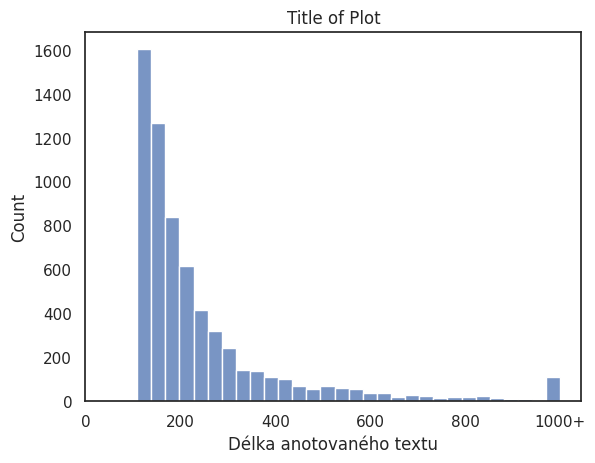

In [25]:
import matplotlib.pyplot as plt
ax = sns.histplot(np.clip(df["text_len"], 0, 1000), bins=30)
ax.set(title='Title of Plot',
       xlabel="Délka anotovaného textu",)
# Customize x-axis ticks and labels
xticks = [0, 200, 400, 600, 800, 1000]
xtick_labels = ["0", "200", "400", "600", "800", "1000+"]

# Set x-axis ticks and labels
plt.xticks(xticks, xtick_labels)
sracka = df["text_len"].unique()
sracka.sort()
df.query("text_len > 1000 ")


            text_len  topics_len
text_len    1.000000    0.101675
topics_len  0.101675    1.000000
PearsonRResult(statistic=0.10167540517231398, pvalue=3.8847398751694483e-16)


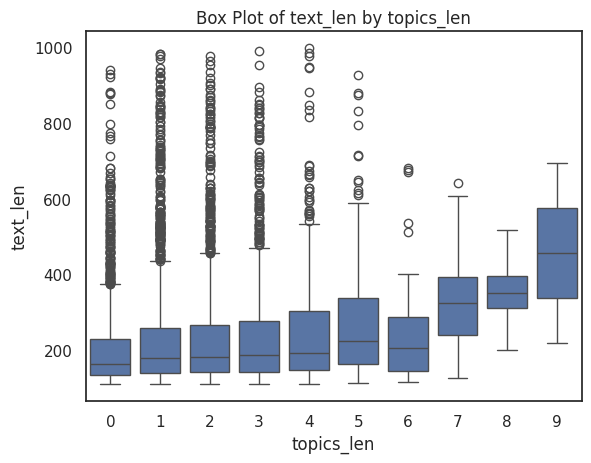

In [55]:
from scipy import stats

df2 = df.query("text_len < 1000 ")
df_lens = df2[["text_len", "topics_len"]]
print(df_lens.corr())

res = stats.pearsonr(df2["text_len"], df2["topics_len"])
print(res)
res.confidence_interval(confidence_level=0.9)

sns.boxplot(x="topics_len", y="text_len", data=df2)
plt.title('Box Plot of text_len by topics_len')
plt.xlabel('topics_len')
plt.ylabel('text_len')
plt.show()

In [27]:
repeating_text_ids = df['text_id'].value_counts()
repeating_text_ids = repeating_text_ids[repeating_text_ids > 1]

df.loc[df['text_id'].isin(repeating_text_ids.keys())]



,text_id,text,user_id,user_topics,topics_len,text_len
46,ab7e751c-69ad-4cac-ad66-28065c9c5f84,"<b>Miluj! Žij v své lásky nebi a neptej se, j...",21e44144-01f2-40b1-a7a5-12f574274943,"[Láska žen, Touha po štěstí]",2,131
47,ab7e751c-69ad-4cac-ad66-28065c9c5f84,"<b>Miluj! Žij v své lásky nebi a neptej se, j...",21e44144-01f2-40b1-a7a5-12f574274943,"[Láska žen, Touha po štěstí]",2,131
142,818d1cac-21d1-436f-b392-6db7b48c7262,<b>A muž z Keriothu vyňal těch třicet stříbrn...,213b0200-9b03-4080-83f5-02195b128e19,"[popis mincí, biblické příběhy , příběh Jidáše]",3,262
143,818d1cac-21d1-436f-b392-6db7b48c7262,<b>A muž z Keriothu vyňal těch třicet stříbrn...,3ff592b1-6789-4b4b-a5fc-5c000f2019be,[popis izraelského šeklu],1,262
634,6f06e9fd-4de6-4ef0-994c-e49f4993e143,"<b>Poněvadž se soudcové nedali přesvědčiti, v...",35fbf6b3-0309-4741-a9a3-a17f992df734,[vražda],1,166
635,6f06e9fd-4de6-4ef0-994c-e49f4993e143,"<b>Poněvadž se soudcové nedali přesvědčiti, v...",35fbf6b3-0309-4741-a9a3-a17f992df734,[vražda],1,166
2659,8a7fe8af-5194-4110-9e6f-4dace50d894d,<b>Lamoignon (stranou). Nebesa! Oni mne drží ...,3ff592b1-6789-4b4b-a5fc-5c000f2019be,[],0,223
2660,8a7fe8af-5194-4110-9e6f-4dace50d894d,<b>Lamoignon (stranou). Nebesa! Oni mne drží ...,3ff592b1-6789-4b4b-a5fc-5c000f2019be,[],0,223
2738,731db828-9232-4b67-add2-f920b3f8a0c3,<b>a) Antonín Ulbricht. Po mém usídlení v Jak...,5b66aaa8-173e-414d-a38f-6fc156ae8b00,[sousedské výpůjčky ],1,388
2739,731db828-9232-4b67-add2-f920b3f8a0c3,<b>a) Antonín Ulbricht. Po mém usídlení v Jak...,3ff592b1-6789-4b4b-a5fc-5c000f2019be,[],0,388


In [28]:
sns.set_theme(style="white")

df2 = df2[["user_id", "topics_len"]]
df2.groupby(["user_id"]).count()


,topics_len
user_id,
19fd3eda-e640-4e08-9047-e413f2c148af,229
213b0200-9b03-4080-83f5-02195b128e19,15
21e44144-01f2-40b1-a7a5-12f574274943,130
2283e9b1-1b15-4638-b2a5-eb1bf6400f7d,146
22bb39f3-d32e-4f55-8d7d-8a75b3e634b1,718
35fbf6b3-0309-4741-a9a3-a17f992df734,1032
378fee78-267f-4c3f-8e23-6861105af343,311
3d3576b3-78d9-4c54-bc2c-06929e310a5c,209
3ff592b1-6789-4b4b-a5fc-5c000f2019be,1216


In [40]:

df3 = df[["user_id", "topics_len"]].copy()
df3["user_id"] = df3["user_id"].apply(lambda guid: guid.split("-")[0])
merge1 = df3.groupby(["user_id"]).agg(["mean", "max", "count"])
df3 = df3.query("topics_len == 0")
merge2 = df3.groupby(["user_id"]).agg(["count"])

dfm = merge1.merge(merge2, on="user_id")
dfm

topics_len_x           topics_len_y
                 mean max count        count
user_id                                     
19fd3eda     2.957806   6   237            1
213b0200     2.600000   6    15            1
2283e9b1     2.635135   7   148            5
22bb39f3     1.659310   9   725          158
35fbf6b3     0.813462   4  1040          474
378fee78     1.667712   4   319            1
3d3576b3     3.525822   8   213            6
3ff592b1     0.760956   3  1255          436
5b66aaa8     2.933333   6    75            2
60864d37     3.289157   6    83            3
7b7f9b9c     3.057143   9   140            4
7defdc5a     2.549383   6   162           12
852596ac     1.580952   6   420          101
98b0b8fc     3.207547   8    53            1
a8ae3b5c     0.000000   0    28           28
c7b3eaa0     2.607362   6   163            4
cb2cd827     1.329897   3   291            2
cda7a4d1     1.323077   5   130           21
d2a76bf5     1.468635   5   271           21
e894e0c2     3.158784   8   296            8
ed297c1f     0.960000   3    25            8
f6645b25     1.100000   4    40           12

In [53]:

out = dfm.to_markdown(index=True, tablefmt='plain', headers=["UserID", "mean", "max", "počet", "z toho 0 anotaci"])
print(out)

UserID        mean    max    počet    z toho 0 anotaci
19fd3eda  2.95781       6      237                   1
213b0200  2.6           6       15                   1
2283e9b1  2.63514       7      148                   5
22bb39f3  1.65931       9      725                 158
35fbf6b3  0.813462      4     1040                 474
378fee78  1.66771       4      319                   1
3d3576b3  3.52582       8      213                   6
3ff592b1  0.760956      3     1255                 436
5b66aaa8  2.93333       6       75                   2
60864d37  3.28916       6       83                   3
7b7f9b9c  3.05714       9      140                   4
7defdc5a  2.54938       6      162                  12
852596ac  1.58095       6      420                 101
98b0b8fc  3.20755       8       53                   1
a8ae3b5c  0             0       28                  28
c7b3eaa0  2.60736       6      163                   4
cb2cd827  1.3299        3      291                   2
cda7a4d1  